In [1]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb

In [15]:
data=pd.read_csv('kc_house_data.csv')
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [16]:
data.price.describe()


count    2.161300e+04
mean     5.400881e+05
std      3.671272e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [18]:
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [19]:
data.shape

(21613, 21)

In [20]:
df = data

In [21]:
df.drop(columns=['id','date','bathrooms','sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade','sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],inplace=True)

In [22]:
df


,price,bedrooms,sqft_living,zipcode
0,221900.0,3,1180,98178
1,538000.0,3,2570,98125
2,180000.0,2,770,98028
3,604000.0,4,1960,98136
4,510000.0,3,1680,98074
...,...,...,...,...
21608,360000.0,3,1530,98103
21609,400000.0,4,2310,98146
21610,402101.0,2,1020,98144
21611,400000.0,3,1600,98027


In [23]:
df.rename(columns = {'bedrooms':'bhk'}, inplace = True)

In [24]:
df.rename(columns = {'bedrooms':'bhk'}, inplace = True)

In [25]:
df


,price,bhk,sqft_living,zipcode
0,221900.0,3,1180,98178
1,538000.0,3,2570,98125
2,180000.0,2,770,98028
3,604000.0,4,1960,98136
4,510000.0,3,1680,98074
...,...,...,...,...
21608,360000.0,3,1530,98103
21609,400000.0,4,2310,98146
21610,402101.0,2,1020,98144
21611,400000.0,3,1600,98027


array([[<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'bhk'}>],
       [<Axes: title={'center': 'sqft_living'}>,
        <Axes: title={'center': 'zipcode'}>]], dtype=object)

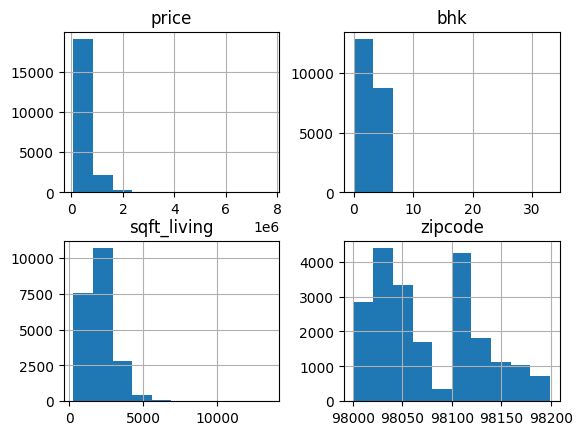

In [26]:
df.hist()


In [27]:
data = df


In [28]:
data


,price,bhk,sqft_living,zipcode
0,221900.0,3,1180,98178
1,538000.0,3,2570,98125
2,180000.0,2,770,98028
3,604000.0,4,1960,98136
4,510000.0,3,1680,98074
...,...,...,...,...
21608,360000.0,3,1530,98103
21609,400000.0,4,2310,98146
21610,402101.0,2,1020,98144
21611,400000.0,3,1600,98027


In [29]:
data.head()

,price,bhk,sqft_living,zipcode
0,221900.0,3,1180,98178
1,538000.0,3,2570,98125
2,180000.0,2,770,98028
3,604000.0,4,1960,98136
4,510000.0,3,1680,98074


In [30]:
data.to_csv("cleaned_data.csv")

In [31]:
x = data.drop(columns=['price'])
y= data['price']

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
import xgboost as xgb
from sklearn.preprocessing import OneHotEncoder , StandardScaler 
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error


In [33]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [34]:
print(x_train.shape)

(17290, 3)


In [35]:
print(x_test.shape)

(4323, 3)


In [36]:
rdmf = RandomForestRegressor()
rdmf.fit(x_train,y_train)
rdmfs = rdmf.score(x_test,y_test)
rdmf.predict(x_test)

array([ 420760.64583333, 1169203.25      ,  521159.66666667, ...,
        398274.5       ,  183680.        ,  499105.23333333])

In [37]:
svr = SVR()
svr.fit(x_train,y_train)
svrs = rdmf.score(x_test,y_test)
svr.predict(x_test)

array([452997.93174951, 453006.14993936, 452997.95725554, ...,
       452997.75477686, 452996.71471262, 452998.46538379])

In [38]:
xgb_reg = xgb.XGBRegressor(n_estimators=100, max_depth=3)
xgb_reg.fit(x_train, y_train)
xgb_reg.predict(x_test)
xgb_regs = xgb_reg.score(x_test,y_test)

In [39]:
print('Extreme Gradient Boosting Regression', xgb_regs)
print('Random Forest =', rdmfs)
print('Support Vector =', svrs)

Extreme Gradient Boosting Regression 0.782847958024135
Random Forest = 0.7451210819827587
Support Vector = 0.7451210819827587


In [40]:
import pickle
pickle.dump(rdmf,open('Model.pkl','wb'))